#Criar um gráfico de pareto

In [10]:
#Imports e Abrir arquivo
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import PercentFormatter
import seaborn as sns

df_nasc_vivos= pd.read_csv('SINASC_RO_2019.csv')
df_nasc_vivos

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,5,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,5,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915


In [19]:
#preparação de dados
#Preparação de dados para o gráfico de Estado Civil
#importante que a coluna com eixo x deve ser o índice (casado, solteriro, etc....)
estcivmae = df_nasc_vivos['ESTCIVMAE'].map({1:'Solteira',2:'Casada',3:'Viúva',
                                         4:'Separado Judicialmente/Divorciado',9:'Ignorado'})
estcivmae_new=estcivmae.fillna('Ignorado')
estcivmae_ord=estcivmae_new.value_counts().to_frame()

estcivmae_ord.columns = ['QTDE']
estcivmae_ord = estcivmae_ord.sort_values(by='QTDE', ascending=False)
estcivmae_ord['Perc'] = round(estcivmae_ord['QTDE'].cumsum()/estcivmae_ord['QTDE'].sum()*100,2)
print(estcivmae_ord)
print(estcivmae_ord.index)




                                   QTDE    Perc
Casada                             9924   36.72
Solteira                           8952   69.84
Ignorado                           7642   98.11
Separado Judicialmente/Divorciado   453   99.79
Viúva                                57  100.00
Index(['Casada', 'Solteira', 'Ignorado', 'Separado Judicialmente/Divorciado',
       'Viúva'],
      dtype='object')


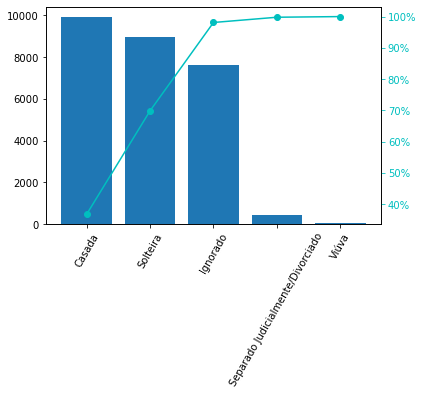

In [28]:
#Gráfico pareto
fig, ax =plt.subplots()
ax.bar(estcivmae_ord.index, estcivmae_ord['QTDE'])
ax2 = ax.twinx()
ax2.plot(estcivmae_ord.index,estcivmae_ord['Perc'], color='c', marker='o')
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis='x', rotation=60)
ax2.tick_params(axis='y', colors='c')
plt.show()